In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

In [ ]:
df = pd.read_csv("dataset/acdemic_data.csv")

# df = pd.read_csv('your_file.csv', na_values=['na', 'NA', 'N.A', 'N/A', ''])

In [10]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Firstname    0
Lastname     0
Gender       0
SPOS         0
DSBDA        3
WT           0
DA           0
dtype: int64


In [23]:
print(df.isnull().values.any())

False


In [17]:
df.notnull().sum()


Firstname    12
Lastname     12
Gender       12
SPOS         12
DSBDA        12
WT           12
DA           12
dtype: int64

In [ ]:
# Now force columns to numeric (safe)

df['DSBDA'] = pd.to_numeric(df['DSBDA'], errors='coerce')

In [14]:
df['SPOS'] = df['SPOS'].fillna(df['SPOS'].mean())
df['DSBDA'] = df['DSBDA'].fillna(df['DSBDA'].mean())
df['WT'] = df['WT'].fillna(df['WT'].mean())

In [ ]:
#Replacing Null with a single constant value 
df['SPOS'].fillna(0, inplace=True)

C:\Users\yashk\AppData\Local\Temp\ipykernel_2452\2861788664.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SPOS'].fillna(0, inplace=True)


In [30]:
# We use method = 'bfill’ for taking values from the next row. 
df['SPOS'].fillna(method='bfill', inplace=True) 
print(df['SPOS'].head(10))

0    85.0
1    90.0
2    99.7
3    95.0
4    99.7
5    87.0
6    81.0
7    40.0
8    10.0
9     9.0
Name: SPOS, dtype: float64


C:\Users\yashk\AppData\Local\Temp\ipykernel_2452\1975764533.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SPOS'].fillna(method='bfill', inplace=True)
C:\Users\yashk\AppData\Local\Temp\ipykernel_2452\1975764533.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['SPOS'].fillna(method='bfill', inplace=True)


In [31]:
#Replacing Null with the value from the previous row or the next row 
#method = 'pad’ for taking values from the previous row 

df['DSBDA'].fillna(method='pad', inplace=True)
print(df['DSBDA'].head(10))

0    88.000
1    90.000
2    87.375
3    86.000
4    84.000
5    87.375
6    80.000
7    88.000
8    96.000
9    87.375
Name: DSBDA, dtype: float64


C:\Users\yashk\AppData\Local\Temp\ipykernel_2452\2720007090.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DSBDA'].fillna(method='pad', inplace=True)
C:\Users\yashk\AppData\Local\Temp\ipykernel_2452\2720007090.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['DSBDA'].fillna(method='pad', inplace=True)


In [15]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Firstname    0
Lastname     0
Gender       0
SPOS         0
DSBDA        0
WT           0
DA           0
dtype: int64


In [24]:
# How to remove rows with missing values

# drop all rows with Null values 
df.dropna(axis=0,inplace=True)

In [25]:
# drop all rows with atleast one null
new_df = df.dropna(axis = 0, how ='any')

In [26]:
# drop all rows with all null
new_df = df.dropna(axis = 0, how ='all')

In [27]:
# drop all columns with atleast one Null
new_df = df.dropna(axis = 1, how ='any')

In [28]:
# drop all columns with all Null 
new_df = df.dropna(axis = 1, how ='all')

In [18]:
df.dropna()   # drops any row with at least 1 NaN

,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88.000,90.000000,92
1,SA,Dixit,F,90.0,90.000,94.000000,95
2,AB,Danial,M,99.7,87.375,100.000000,80
3,DA,Kapoor,M,95.0,86.000,500.000000,82
4,SA,Jha,F,99.7,84.000,98.000000,84
5,WS,Thakur,F,87.0,87.375,97.000000,86
6,DY,Kapoor,M,81.0,80.000,96.000000,89
7,JK,Khanna,F,40.0,88.000,95.000000,87
8,RT,Pardesi,M,10.0,96.000,94.000000,88
9,UV,Pardesi,M,9.0,87.375,93.000000,96


In [21]:
df.dropna(axis=1)

,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88.000,90.000000,92
1,SA,Dixit,F,90.0,90.000,94.000000,95
2,AB,Danial,M,99.7,87.375,100.000000,80
3,DA,Kapoor,M,95.0,86.000,500.000000,82
4,SA,Jha,F,99.7,84.000,98.000000,84
5,WS,Thakur,F,87.0,87.375,97.000000,86
6,DY,Kapoor,M,81.0,80.000,96.000000,89
7,JK,Khanna,F,40.0,88.000,95.000000,87
8,RT,Pardesi,M,10.0,96.000,94.000000,88
9,UV,Pardesi,M,9.0,87.375,93.000000,96


The inplace=True parameter in pandas is used to modify the original DataFrame directly, rather than creating and returning a new modified DataFrame.

In [ ]:
df.replace('na', np.nan)  # replace 'na' text with real NaN
df.replace(0, 100)        # replace 0 with 100

df.replace(["na", "Na", "NA", "n/a", "N/A", "", "missing"], pd.NA, inplace=True)


,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88.000,90.000000,92
1,SA,Dixit,F,90.0,90.000,94.000000,95
2,AB,Danial,M,99.7,87.375,100.000000,80
3,DA,Kapoor,M,95.0,86.000,500.000000,82
4,SA,Jha,F,99.7,84.000,98.000000,84
5,WS,Thakur,F,87.0,87.375,97.000000,86
6,DY,Kapoor,M,81.0,80.000,96.000000,89
7,JK,Khanna,F,40.0,88.000,95.000000,87
8,RT,Pardesi,M,10.0,96.000,94.000000,88
9,UV,Pardesi,M,9.0,87.375,93.000000,96


Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1f1e119b290>,
 'caps': [<matplotlib.lines.Line2D at 0x1f1e11a4650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f1e119a9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f1e11a5890>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f1e11a60d0>],
 'means': []}

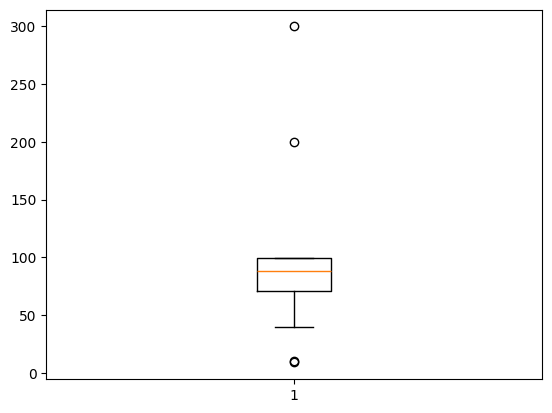

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplot
plt.boxplot(x=df['SPOS'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1f1df103390>,
 'caps': [<matplotlib.lines.Line2D at 0x1f1e1130d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f1df120410>],
 'medians': [<matplotlib.lines.Line2D at 0x1f1e1131f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f1e1132750>],
 'means': []}

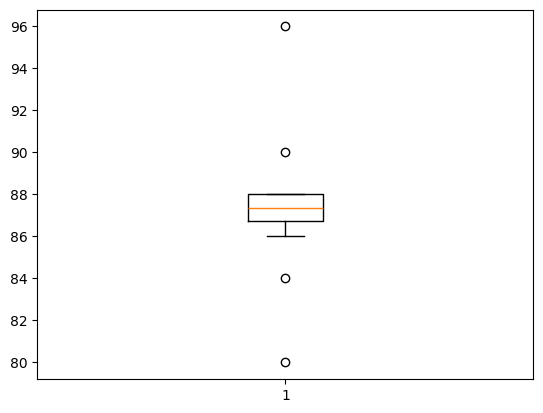

In [34]:
plt.boxplot(x=df['DSBDA'])

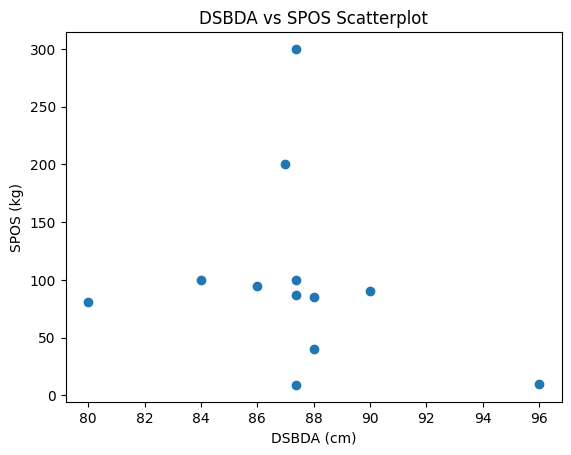

In [36]:
plt.scatter(df['DSBDA'], df['SPOS'])
plt.xlabel('DSBDA (cm)')
plt.ylabel('SPOS (kg)')
plt.title('DSBDA vs SPOS Scatterplot')
plt.show()